**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**
---
Clase 9 - Práctica de derivadas y variaciones

In [1]:
#librerias de la clase
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

### Ejercicio 1: Derivada simbólica y evaluación
Dada la función $h(x) = \frac{e^{x^2}}{\sqrt{x}} + \cos(x) \cdot \ln(x)$, utiliza `SymPy` para:
1.  Definir la función $h(x)$ simbólicamente.
2.  Calcular la primera derivada de $h(x)$ con respecto a $x$.
3.  Simplificar la expresión de la derivada si es posible.
4.  Evaluar la derivada en un punto arbitrario (por ejemplo, $x = 2$) utilizando `.subs()` y `.evalf()`.

In [2]:
# Paso 1: Definición simbólica de h(x)
# Dominio h(x): x > 0 (para garantizar dominio de sqrt(x) y ln(x))
x = sp.Symbol('x', positive=True)

h = sp.exp(x**2)/sp.sqrt(x) + sp.cos(x)*sp.log(x)

print('h(x) =')
sp.pprint(h)

h(x) =
                 ⎛ 2⎞
                 ⎝x ⎠
                ℯ    
log(x)⋅cos(x) + ─────
                 √x  


In [3]:
# Paso 2: Cálculo de la primera derivada h'(x)
# Utilizamos la función diff de SymPy para derivar término a término
h_prime = sp.diff(h, x)

print("h'(x) =")
sp.pprint(h_prime)

h'(x) =
                                       ⎛ 2⎞ 
      ⎛ 2⎞                             ⎝x ⎠ 
      ⎝x ⎠                   cos(x)   ℯ     
2⋅√x⋅ℯ     - log(x)⋅sin(x) + ────── - ──────
                               x         3/2
                                      2⋅x   


In [4]:
# Paso 3: Simplificación de la derivada h'(x)
# Partimos de h_prime calculada previamente
h_prime_simpl = sp.simplify(h_prime)

print("Derivada original:")
sp.pprint(h_prime)
print("\nDerivada simplificada (simplify):")
sp.pprint(h_prime_simpl)

# Intentamos factorización adicional si aporta legibilidad
h_prime_factor = sp.factor(h_prime_simpl)
print("\nDerivada factorizada (factor):")
sp.pprint(h_prime_factor)

Derivada original:
                                       ⎛ 2⎞ 
      ⎛ 2⎞                             ⎝x ⎠ 
      ⎝x ⎠                   cos(x)   ℯ     
2⋅√x⋅ℯ     - log(x)⋅sin(x) + ────── - ──────
                               x         3/2
                                      2⋅x   

Derivada simplificada (simplify):
                                       ⎛ 2⎞ 
      ⎛ 2⎞                             ⎝x ⎠ 
      ⎝x ⎠                   cos(x)   ℯ     
2⋅√x⋅ℯ     - log(x)⋅sin(x) + ────── - ──────
                               x         3/2
                                      2⋅x   

Derivada factorizada (factor):
                                               ⎛ 2⎞      ⎛ 2⎞
     5/2                    3/2             3  ⎝x ⎠      ⎝x ⎠
- 2⋅x   ⋅log(x)⋅sin(x) + 2⋅x   ⋅cos(x) + 4⋅x ⋅ℯ     - x⋅ℯ    
─────────────────────────────────────────────────────────────
                              5/2                            
                           2⋅x                               


In [6]:
# Paso 4: Evaluación de la derivada en x = 2
# Utilizamos .subs() para sustituir y .evalf() para obtener valor numérico

# Evaluamos usando la derivada simplificada
punto_evaluacion = 2
h_prime_en_2 = h_prime_simpl.subs(x, punto_evaluacion)

print(f"h'({punto_evaluacion}) Evaluamos la primera derivada, sustituyendo directamente:")
sp.pprint(h_prime_en_2)

# Evaluamos numéricamente con .evalf()
h_prime_en_2_numerico = h_prime_en_2.evalf()
print(f"h'({punto_evaluacion}) ≈ {h_prime_en_2_numerico}")

# También evaluamos la función original en el mismo punto para contexto
print(f"\n{80*'='}")
print(f"\nh({punto_evaluacion}) Evaluamos la función, sustituyendo directamente:")
h_en_2 = h.subs(x, punto_evaluacion)
sp.pprint(h_en_2)

h_en_2 = h.subs(x, punto_evaluacion).evalf()
print(f"\nh({punto_evaluacion}) ≈ {h_en_2}")

h'(2) Evaluamos la primera derivada, sustituyendo directamente:
                                 4
                 cos(2)   15⋅√2⋅ℯ 
-log(2)⋅sin(2) + ────── + ────────
                   2         8    
h'(2) ≈ 143.936857616570


h(2) Evaluamos la función, sustituyendo directamente:
                    4
                √2⋅ℯ 
log(2)⋅cos(2) + ─────
                  2  

h(2) ≈ 38.3182711222252


Función original: h(2.0) ≈ 38.3
Primera derivada: h'(2.0) ≈ 143.9
Interpretación: En x=2.0, la función está creciendo a una tasa de 143.9 unidades por unidad de x


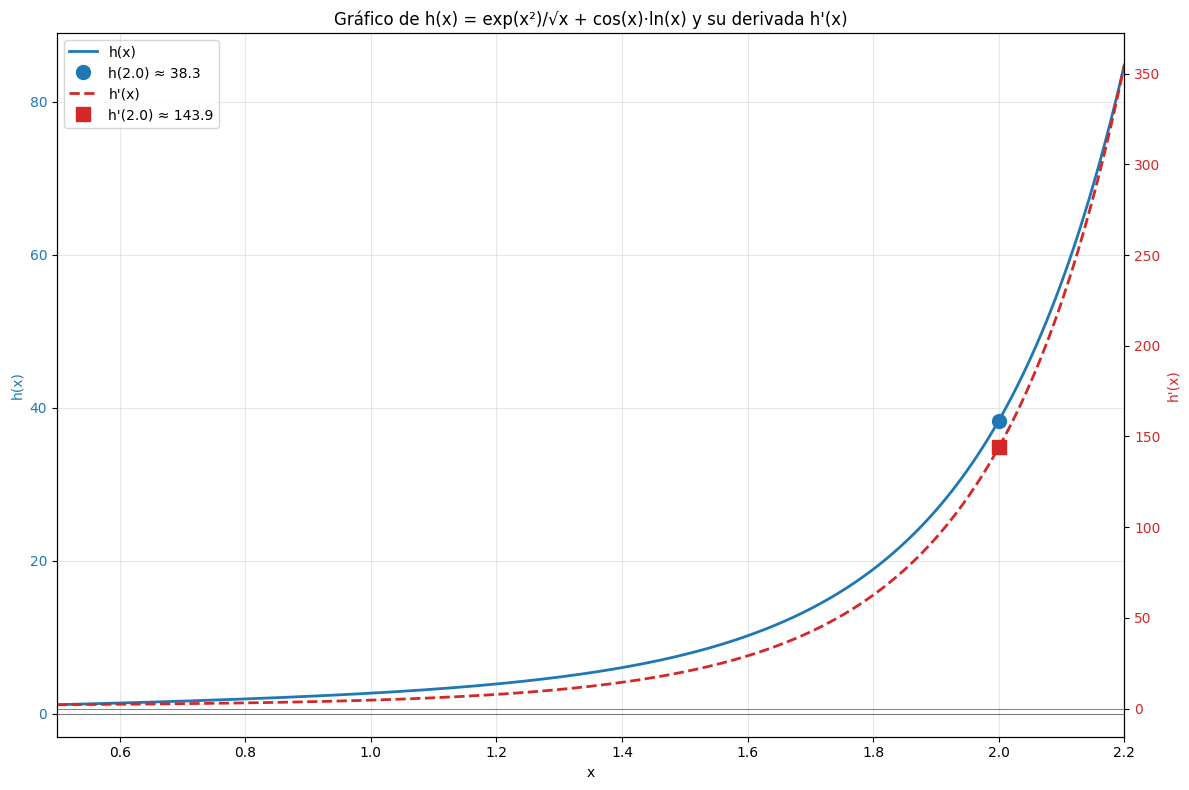

In [7]:
# Paso adicional: Gráfico de la función h(x) y su derivada h'(x)
# Convertimos las funciones simbólicas a numéricas para graficar

# Creamos funciones numéricas usando lambdify
h_numerica = sp.lambdify(x, h, 'numpy')
h_prime_numerica = sp.lambdify(x, h_prime_simpl, 'numpy')

# Rango de valores limitado para mejor visualización del punto x=2
x_vals = np.linspace(0.5, 2.2, 1000)
y_vals = h_numerica(x_vals)
y_prime_vals = h_prime_numerica(x_vals)

# Creamos el gráfico con dos ejes Y para diferentes escalas
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje principal para h(x)
color1 = 'tab:blue'
ax1.set_xlabel('x')
ax1.set_ylabel('h(x)', color=color1)
line1 = ax1.plot(x_vals, y_vals, color=color1, linewidth=2, label='h(x)')
ax1.tick_params(axis='y', labelcolor=color1)

# Marcamos el punto donde evaluamos la función
punto_x = float(punto_evaluacion)
punto_y = float(h_en_2)
ax1.plot(punto_x, punto_y, 'o', color=color1, markersize=10,
         label=f'h({punto_x}) ≈ {punto_y:.1f}')

# Eje secundario para h'(x)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("h'(x)", color=color2)
line2 = ax2.plot(x_vals, y_prime_vals, color=color2, linewidth=2,
                 linestyle='--', label="h'(x)")
ax2.tick_params(axis='y', labelcolor=color2)

# Marcamos el punto donde evaluamos la derivada
punto_y_prime = float(h_prime_en_2_numerico)
ax2.plot(punto_x, punto_y_prime, 's', color=color2, markersize=10,
         label=f"h'({punto_x}) ≈ {punto_y_prime:.1f}")

# Configuración del gráfico
ax1.set_title('Gráfico de h(x) = exp(x²)/√x + cos(x)·ln(x) y su derivada h\'(x)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.5, 2.2)

# Líneas de referencia
ax1.axhline(y=0, color='k', linewidth=0.5, alpha=0.7)
ax2.axhline(y=0, color='k', linewidth=0.5, alpha=0.7)

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

print(f"Función original: h({punto_x}) ≈ {punto_y:.1f}")
print(f"Primera derivada: h'({punto_x}) ≈ {punto_y_prime:.1f}")
print(f"Interpretación: En x={punto_x}, la función está creciendo a una tasa de {punto_y_prime:.1f} unidades por unidad de x")

plt.tight_layout()
plt.show()

### Ejercicio 2: Derivada numérica y suavizado (Ejercicio dificil)
Considera los datos de precios de las acciones de YPF (`ypf["price"]`) que cargamos anteriormente.
1.  Calcula la segunda derivada numérica de la serie de precios ruidosa (`ypf["price"]`) utilizando `np.gradient()`.
2.  Aplica un promedio móvil a la serie de precios ruidosa con una ventana de 30 días (en lugar de 15).
3.  Calcula la primera derivada numérica de la serie de precios suavizada con la nueva ventana.
4.  Grafica la serie de precios original, la serie suavizada y las dos derivadas calculadas (la del dato ruidoso y la del dato suavizado) en un mismo gráfico para comparar los resultados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
#Paso 1:
#Importamos el archivo de ypf
ypf = pd.read_excel("dataset_clase9.xlsx")

#Calculamos la 2da derivada
D2_ypf = np.gradient(np.gradient(ypf["price"]))

In [11]:
#Paso 2:
#Aplicamos un promedio móvil usando .rolling
ypf["price_smooth"] = ypf["price"].rolling(window=30).mean()



#Paso 3:
#Calculamos la 1ra derivada con la ventana de 30 días
D_smooth_ypf = np.gradient(ypf["price_smooth"].dropna()) #.dropna() "elimina" los espacios vacíos que .rolling genera antes de llegar a 30


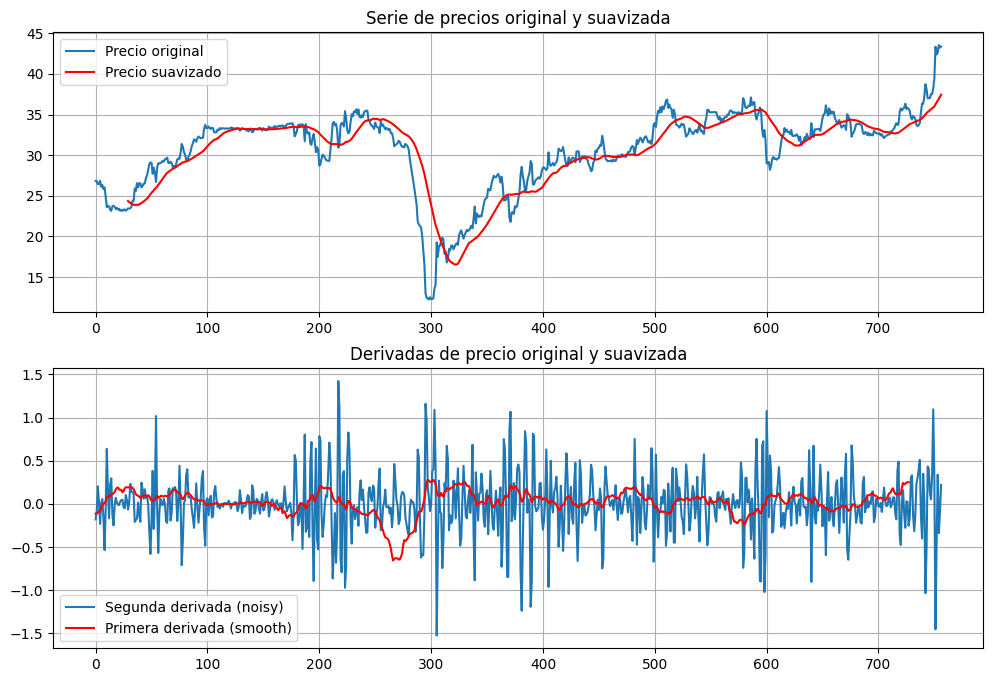

In [12]:
#Paso 4:
#Graficamos: serie de precios original, serie suavizada, derivada noisy y derivada smooth
#Original y suavizada:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
ax1.plot(ypf["price"], label = "Precio original")
ax1.plot(ypf["price_smooth"], label = "Precio suavizado", color = "red")
ax1.set_title("Serie de precios original y suavizada")
ax1.legend()
ax1.grid(True)
#Derivada noisy y derivada smooth:
ax2.plot(D2_ypf, label = "Segunda derivada (noisy)")
ax2.plot(D_smooth_ypf, label = "Primera derivada (smooth)", color = "red")
ax2.set_title("Derivadas de precio original y suavizada")
ax2.legend()
ax2.grid(True)

plt.show()


### Ejercicio 3: Aplicación a funciones organizacionales
Retomando las funciones de Ingreso Total ($R(q)$), Costo Total ($C(q)$) y Beneficio Total ($B(q)$) definidas simbólicamente con los parámetros dados:
1.  Encuentra simbólicamente la cantidad $q$ donde el Ingreso Marginal ($MR$) es igual al Costo Marginal ($MC$) resolviendo la ecuación $MR - MC = 0$. Utiliza `sp.solve()`.
2.  Verifica si este punto corresponde a un máximo o mínimo del Beneficio Total ($B(q)$) evaluando la segunda derivada del Beneficio Total ($dMB$) en ese punto.

In [ ]:
# Resolver Ejercicio 3